### Script to plot 1kGP non-ref seqs against b38

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("~/.matplotstyle/scientific.mplstyle")
#plt.style.use('default')

In [3]:
before = "/cbio/projects/012/stream1/team/jess/b38align/analysis.out"

data = []
with open(before, 'r') as f:
    next(f) # skipping header
    for line in f:
        pieces = line.strip().split('\t')
        data.append(pieces)

columns = data.pop(0)
data.pop(0) # don't want the 100% coverage and identity row
for item in data:
    for i,n in enumerate(item):
        item[i] = float(n)

df = pd.DataFrame(data, columns = columns)
df["Identity"] = df["Identity"].astype(int)
df["Coverage"] = df["Coverage"].astype(int)
df["UniqueContigMatches"] = df["UniqueContigMatches"].astype(int)
df["Totalbp"] = df["Totalbp"].astype(int)
print (df)

   Identity  Coverage  UniqueContigMatches  PercentageContigs   Totalbp    Mbp
0        90        50                20618              46.36  30748540  30.75
1        90        60                19508              43.87  28101255  28.10
2        90        70                18415              41.41  24858951  24.86
3        90        80                17239              38.76  20704271  20.70
4        90        90                15982              35.94  15566408  15.57
5        90       100                13122              29.51   9518720   9.52


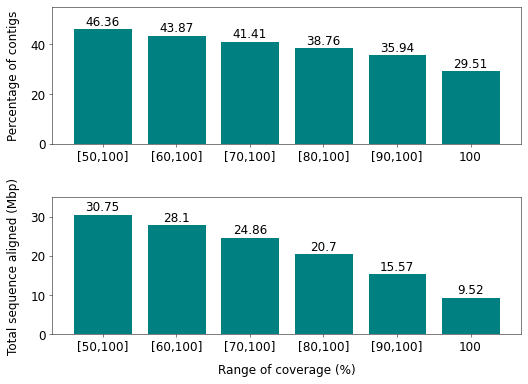

In [4]:
coverage = df["Coverage"]
coverage = ["[50,100]", "[60,100]", "[70,100]", "[80,100]", "[90,100]", "100"]
mbp = df["Mbp"]
percentage = df["PercentageContigs"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5,5.5))
ax1.bar (coverage, percentage, width = 0.8, color = 'teal', edgecolor = 'white')
for index, value in enumerate(percentage):
    ax1.text(index, value, str(value), horizontalalignment="center", verticalalignment="bottom")
ax1.set(ylabel = 'Percentage of contigs')
ax1.set_ylim(top = 55)

ax2.bar (coverage, mbp, width = 0.8, color = 'teal', edgecolor = 'white')
for index, value in enumerate(mbp):
    ax2.text(index, value, str(value), horizontalalignment="center", verticalalignment="bottom")
ax2.set(ylabel = 'Total sequence aligned (Mbp)')
ax2.set(xlabel = 'Range of coverage (%)')
ax2.set_ylim(top = 35)

# plt.savefig('1kgb38align.svg', format='svg', dpi=1200)
plt.show()